<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 4: Example of fully connected neural networks

In this notebook, we will implement a fully connected neural network using Keras and Tensorflow.

But first, let's see what Keras and Tensorflow are and the benefits and reasons for using each one.



## Machine learning libraries

Machine learning uses a variety of math models and calculations to answer specific questions about data. Examples of machine learning in action include detecting spam emails, determining certain objects using computer vision, recognizing speech, recommending products, and even predicting commodities values years in the future.

The calculations implicit in machine learning and deep learning are very complicated to set up to ensure correct output (answers). A variety of machine learning libraries have emerged to help navigate these complexities. With these options, new folks can start getting into data science easily. Some of the most popular machine learning libraries include:

- TensorFlow
- Keras
- scikit-learn
- Theano
- Microsoft Cognitive Toolkit (CNTK)

So, how do you know when to use which? It’s a bit of a trick question—using Keras wrapped around TensorFlow means you’re using both. But we’ll show the benefits of each, and why we think Keras should be used in most circumstances.

### What is TensorFlow?

TensorFlow is an open-source ML library that uses symbolic math for dataflow and differentiable programming. Developed by Google and released in 2015, TensorFlow is an ML newcomer that’s earned worldwide popularity because of its easy-to-use APIs and simplicity compared to its predecessors. TensorFlow’s most used ML application is neural networks, which can analyze handwriting and recognize faces. Though TF is written in Python, a JavaScript port is available thanks to JavaScript’s recent popularity.

TensorFlow is useful because it can scale problems with no limit—nodes in a graph can run across a distributed network. The logic in TF is unique, relying on both a machine’s CPU and its GPU. Adding in the graphical processor unit gives TF a lot more power per machine.

The benefits of TensorFlow include:

- **Increased functionality**. While Keras has many general functions for ML and deep learning, TF’s is more advanced, particularly in high-level operations like threading and queues and debugging.
- **Increased control**. You don’t always need a lot of control, but some neural networks may require it so you have better understanding and insight, particularly when working with operations like weights or gradients.
Many users and data scientists recognize that TensorFlow can be difficult to use because of this complexity—it’s not the most welcoming, particularly for new users.

### Benefits of using Keras

Like TensorFlow, Keras is an open-source, ML library that’s written in Python. The biggest difference, however, is that Keras wraps around the functionalities of other ML and DL libraries, including TensorFlow, Theano, and CNTK. Because of TF’s popularity, Keras is closely tied to that library.

Many users and data scientists, us included, like using Keras because it makes TensorFlow much easier to navigate—which means you’re far less prone to make models that offer the wrong conclusions.

Keras builds and trains neural networks, but it is user friendly and modular, so you can experiment more easily with deep neural networks. Keras is a great option for anything from fast prototyping to state-of-the-art research to production. The key advantages of using Keras, particularly over TensorFlow, include:

- **Ease of use**. The simple, consistent UX in Keras is optimized for use cases, so you get clear, actionable feedback for most errors.
- **Modular composition**. Keras models connect configurable building blocks, with few restrictions.
- **Highly flexible and extendable**. You can write custom blocks for new research and create new layers, loss functions, metrics, and whole models.

### When to use Keras

Keras offers something unique in machine learning: a single API that works across several ML frameworks to make that work easier. We recommend using Keras for most, if not all, of your machine learning projects.

Some say that a good rule of thumb is to use Keras unless you are building a very special neural network or you want the control and ability to watch how your network changes over time. Because Keras is so integrated with TensorFlow, you can start and build on Keras and then insert anything using TF.

Still not convinced to use Keras over TensorFlow? Consider:

- **Pandas makes life easy**. A big reason for this is that Keras works with Pandas datasets, creating Tensors for you. TensorFlow requires you to write all the code to create Tensors yourself.
- **Less NumPys**. NumPy is complicated. As you’ll see in the TensorFlow code below, much effort is spent working with NumPy arrays. The Keras code uses it only once (to make a one-hot vector). Keras lets you work with dataframes or NumPy arrays interchangeably.
- **Keras avoids low-level details**. Keras figures out low-level details for you, like whether a Pandas column is categorical or a number. In TensorFlow, you have to tell it explicitly:

`Casino = tf.feature_column.numeric_column("Casino")`

- **Advanced TensorFlow functions**. Keras code still imports TensorFlow, so you can program TensorFlow functions directly.
- **GPU Support**. Keras imports TensorFlow, so you can opt for CPU-only support or add in GPU support. It’s up to you.
- **Keras supports other frameworks, too**. You’re not locked into TensorFlow when you use Keras; you can work with additional ML frameworks and libraries.

[[Source](https://www.bmc.com/blogs/tensorflow-vs-keras/)]

After this small introduction discussing the advantages and cons of each framework, we'll start with our examples. As our examples are simple, we won't be needing any of the extended flexibility and funcionality of `TensorFlow`, so we will stick to `Keras`.

## 1. Loading the data

Next code loads the libraries we will need during this notebook. It also creates the synthetic data we will use to train the neural network using the functions available in  `sklearn.datasets`.

Text(0.5, 1.0, 'Test set')

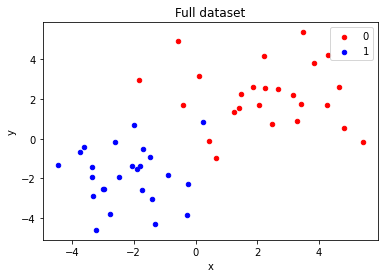

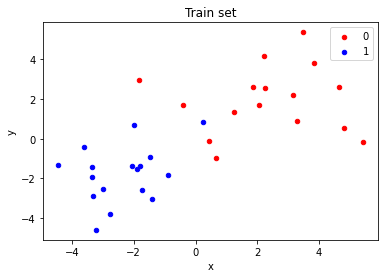

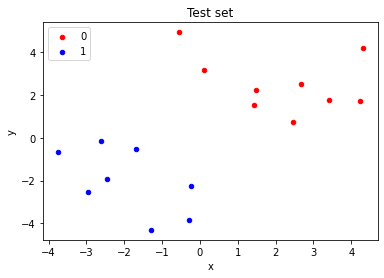

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_blobs(n_samples=50, centers=((2, 2), (-2, -2)), cluster_std=1.5, n_features=2, random_state=0)

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

# scatter plot, dots colored by class value - full dataset
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.title('Full dataset')

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.title('Train set')

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_test))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.title('Test set')

## 2. Simple example with a single hidden layer and one neuron

Next, we will implement our neural network using Keras. In this case, it will only have a single hidden layer with one neuron.

There are 2 kind of models in Keras: the Sequential, to build the model adding layer after layer, and the Functional API, to do more complex things with more flexibility. We will use the Sequential during all the notebook, but feel free to have a look at the [Functional API](https://keras.io/guides/functional_api/).

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from pandas import DataFrame

As you already know, neural networks are stochastic, which means that we need to take some care if we want our experiments to be reproducible. That means initialising the seeds for numpy, tensorflow and keras to a specific value. Let's do it:

In [ ]:
import numpy as np
np.random.seed(1)

In [ ]:
# create the Sequential model
model = Sequential()

# add a hidden layer with a single neuron
model.add(Dense(1, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

Now that we have created our network, we need to pick the optimiser, the cost function and the metrics to compute.

In this cas, we will use the vanila stochastic gradient descent algorithm with a learning rate of 0.1. The cost function will be the mean squared error and the metrics to compute the accuracy.

In [ ]:
# set up the network
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])

With the network created and configured, we just need to train the network. To do so, we need the method `fit`, to which we need to specify the `batch_size`, the number of epochs, the percentage we want to us for validation (`validation_split`) and what data we want it to print on screen (`verbose`).

The returned `history` object holds a record of the loss values and metric values during training. In this case, since we specified a split for validation, we will get the training and validation losses, and the same for the accuracy.

We will expect the losses to decrease during training, and the accuracy to increase. We'll also pay attention to the gap between training and validation values, to try to avoid overfitting the data.

In [ ]:
# train the network
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 0.2848 - accuracy: 0.4615 - val_loss: 0.2620 - val_accuracy: 0.4286
Epoch 2/200
1/1 - 0s - loss: 0.2802 - accuracy: 0.5385 - val_loss: 0.2597 - val_accuracy: 0.4286
Epoch 3/200
1/1 - 0s - loss: 0.2757 - accuracy: 0.5769 - val_loss: 0.2575 - val_accuracy: 0.4286
Epoch 4/200
1/1 - 0s - loss: 0.2715 - accuracy: 0.5769 - val_loss: 0.2555 - val_accuracy: 0.4286
Epoch 5/200
1/1 - 0s - loss: 0.2678 - accuracy: 0.5769 - val_loss: 0.2535 - val_accuracy: 0.4286
Epoch 6/200
1/1 - 0s - loss: 0.2641 - accuracy: 0.5769 - val_loss: 0.2516 - val_accuracy: 0.4286
Epoch 7/200
1/1 - 0s - loss: 0.2605 - accuracy: 0.5769 - val_loss: 0.2497 - val_accuracy: 0.4286
Epoch 8/200
1/1 - 0s - loss: 0.2570 - accuracy: 0.5769 - val_loss: 0.2477 - val_accuracy: 0.5714
Epoch 9/200
1/1 - 0s - loss: 0.2527 - accuracy: 0.6538 - val_loss: 0.2457 - val_accuracy: 0.5714
Epoch 10/200
1/1 - 0s - loss: 0.2487 - accuracy: 0.6538 - val_loss: 0.2444 - val_accuracy: 0.5714
Epoch 11/200
1/1 - 0s - loss:

As we just saw, the `history` object keeps a record of the loss values and the metrics:

In [ ]:
# see history content
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


We can then use these data to visualise the training curves and check how the training goes by monitoring the loss and accuracy.

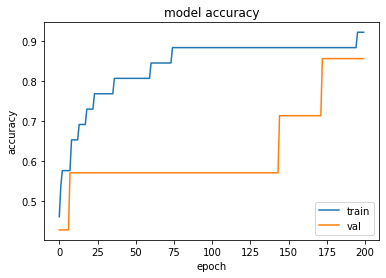

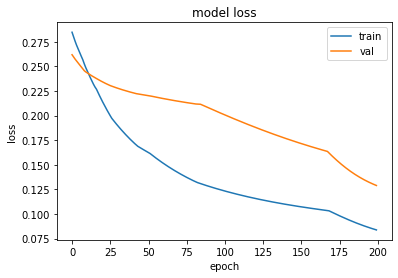

In [ ]:
# visualise accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# visualise loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

We can now evaluate the model with the test data and visualise the results:

1/1 [==============================] - 0s 14ms/step - loss: 0.0405 - accuracy: 1.0000
Test results - Loss: 0.04045867919921875 - Accuracy: 100.0%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


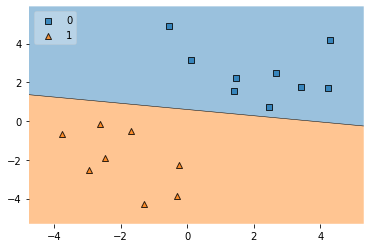

In [ ]:
# evaluate the model
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# plot the decision boundary
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

Note how we were able to solve this problem with a very simple architecture consisting of a single hidden layer with only one neuron. But... how do you think it will work with a more complex problem?

Let's see it! 

We'll now create another synthetic dataset, in this case with a circular data distribution, and test different architectures with 1, 2 and 10 neurons. In addition, we'll do a last example with two hidden layers with 3 and 2 neurons respectively, and compare it to the previous examples.

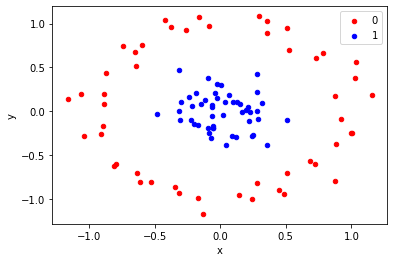

In [ ]:
from sklearn.datasets import make_circles

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.25, random_state=42)

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### 1 neuron

In [ ]:
# create the Sequential model
model = Sequential()

In [ ]:
# add the different layers
model.add(Dense(1, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# configure the network
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])

In [ ]:
# set seed for reproducibility
np.random.seed(3)

# train the network
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 154ms/step - loss: 0.2729 - accuracy: 0.4373 - val_loss: 0.2668 - val_accuracy: 0.5714
Epoch 2/500
2/2 [==============================] - 0s 46ms/step - loss: 0.2712 - accuracy: 0.5358 - val_loss: 0.2663 - val_accuracy: 0.5714
Epoch 3/500
2/2 [==============================] - 0s 39ms/step - loss: 0.2739 - accuracy: 0.5670 - val_loss: 0.2660 - val_accuracy: 0.5714
Epoch 4/500
2/2 [==============================] - 0s 37ms/step - loss: 0.2687 - accuracy: 0.6087 - val_loss: 0.2657 - val_accuracy: 0.5714
Epoch 5/500
2/2 [==============================] - 0s 35ms/step - loss: 0.2743 - accuracy: 0.5566 - val_loss: 0.2653 - val_accuracy: 0.5714
Epoch 6/500
2/2 [==============================] - 0s 42ms/step - loss: 0.2690 - accuracy: 0.5983 - val_loss: 0.2650 - val_accuracy: 0.5714
Epoch 7/500
2/2 [==============================] - 0s 36ms/step - loss: 0.2712 - accuracy: 0.5774 - val_loss: 0.2647 - val_accuracy: 0.5714
Epoch 8/500
2/2 [==

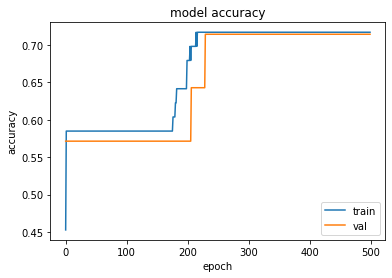

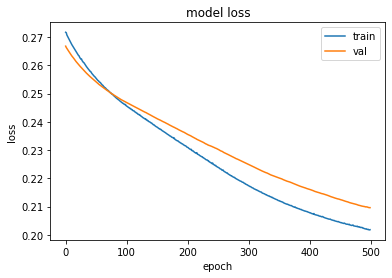

In [ ]:
# visualise accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# visualise loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.5455
Test results - Loss: 0.22357791662216187 - Accuracy: 54.54545617103577%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


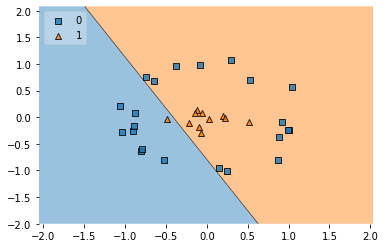

In [ ]:
# evaluate the model
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# visualise the decision boundary
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

As you can observe, the model does not have enough capacity (i.e. it's not complex enough) to solve this problem. Therefore, we have two possibilities:

- Transform the data in some way that makes it easier to separate, for example, transforming from cartesian to polar coordinates
- Increase the complexity of the model so that neural network deals with the data transformation automatically

We'll see the second case, the most typical.

### 2 neurons

In [ ]:
# create the Sequential model
model = Sequential()

In [ ]:
# add the different layers
model.add(Dense(2, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# configure the network
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])

In [ ]:
# set seed for reproducibility
np.random.seed(3)

# train the network
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, verbose=1)

Epoch 1/1500
2/2 [==============================] - 0s 182ms/step - loss: 0.2482 - accuracy: 0.4143 - val_loss: 0.2463 - val_accuracy: 0.6429
Epoch 2/1500
2/2 [==============================] - 0s 43ms/step - loss: 0.2477 - accuracy: 0.4980 - val_loss: 0.2458 - val_accuracy: 0.7143
Epoch 3/1500
2/2 [==============================] - 0s 47ms/step - loss: 0.2469 - accuracy: 0.5879 - val_loss: 0.2453 - val_accuracy: 0.7857
Epoch 4/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.2462 - accuracy: 0.6590 - val_loss: 0.2448 - val_accuracy: 0.7857
Epoch 5/1500
2/2 [==============================] - 0s 45ms/step - loss: 0.2455 - accuracy: 0.7510 - val_loss: 0.2444 - val_accuracy: 0.7857
Epoch 6/1500
2/2 [==============================] - 0s 45ms/step - loss: 0.2451 - accuracy: 0.7406 - val_loss: 0.2439 - val_accuracy: 0.7857
Epoch 7/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.2445 - accuracy: 0.7510 - val_loss: 0.2435 - val_accuracy: 0.7857
Epoch 8/1500

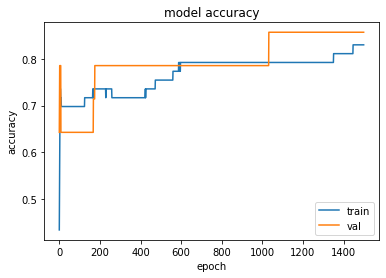

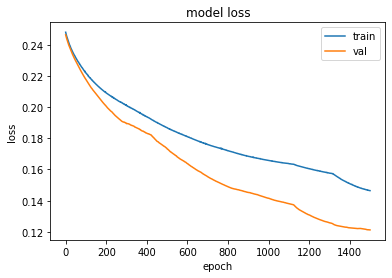

In [ ]:
# visualise accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# visualise loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 4ms/step - loss: 0.1558 - accuracy: 0.7879
Test results - Loss: 0.15584254264831543 - Accuracy: 78.78788113594055%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


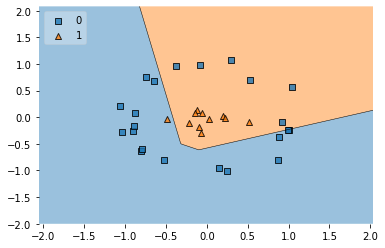

In [ ]:
# evaluate the model
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# visualise the decision boundary
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

### 10 neurons

In [ ]:
# create the Sequential model
model = Sequential()

In [ ]:
# add the different layers
model.add(Dense(10, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# configure the network
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])

In [ ]:
# let's check the architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set seed for reproducibility
np.random.seed(1)

# train the network
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, verbose=1)

Epoch 1/1500
2/2 [==============================] - 1s 294ms/step - loss: 0.2579 - accuracy: 0.5167 - val_loss: 0.2857 - val_accuracy: 0.5000
Epoch 2/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.2566 - accuracy: 0.5419 - val_loss: 0.2849 - val_accuracy: 0.5000
Epoch 3/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.2574 - accuracy: 0.6026 - val_loss: 0.2840 - val_accuracy: 0.5000
Epoch 4/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.2570 - accuracy: 0.6026 - val_loss: 0.2832 - val_accuracy: 0.5000
Epoch 5/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.2555 - accuracy: 0.6360 - val_loss: 0.2824 - val_accuracy: 0.5000
Epoch 6/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.2524 - accuracy: 0.6360 - val_loss: 0.2815 - val_accuracy: 0.5000
Epoch 7/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.2505 - accuracy: 0.6842 - val_loss: 0.2807 - val_accuracy: 0.5000
Epoch 8/1500

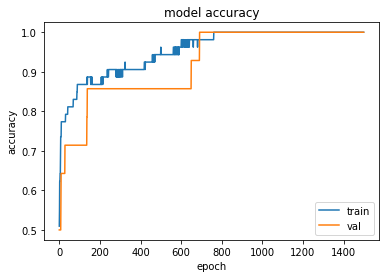

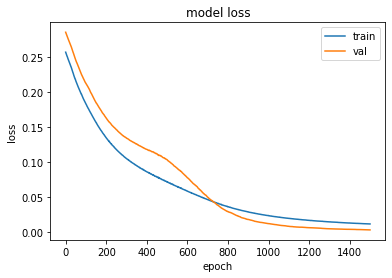

In [ ]:
# visualise accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# visualise loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000
Test results - Loss: 0.009796199388802052 - Accuracy: 100.0%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


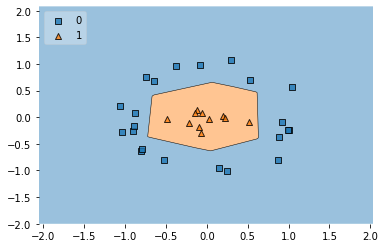

In [ ]:
# evaluate the model
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# visualise the decision boundary
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

### 2 layers with 3 and 2 neurons respectively

In [ ]:
# create the Sequential model
model = Sequential()

In [ ]:
# add the different layers
model.add(Dense(3, input_shape=(2,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))

In [ ]:
# configure the network
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])

In [ ]:
# set seed for reproducibility
np.random.seed(1)

# train the network
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, verbose=1)

Epoch 1/1500
2/2 [==============================] - 1s 307ms/step - loss: 0.2604 - accuracy: 0.4959 - val_loss: 0.2584 - val_accuracy: 0.5714
Epoch 2/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.2591 - accuracy: 0.5983 - val_loss: 0.2579 - val_accuracy: 0.5714
Epoch 3/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.2616 - accuracy: 0.5774 - val_loss: 0.2574 - val_accuracy: 0.5714
Epoch 4/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.2551 - accuracy: 0.6191 - val_loss: 0.2569 - val_accuracy: 0.5714
Epoch 5/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.2620 - accuracy: 0.5462 - val_loss: 0.2564 - val_accuracy: 0.5714
Epoch 6/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.2581 - accuracy: 0.5774 - val_loss: 0.2559 - val_accuracy: 0.5714
Epoch 7/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.2579 - accuracy: 0.5774 - val_loss: 0.2556 - val_accuracy: 0.5714
Epoch 8/1500

In [ ]:
# let's check the architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


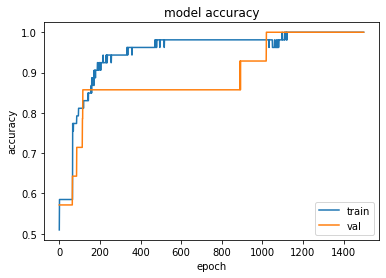

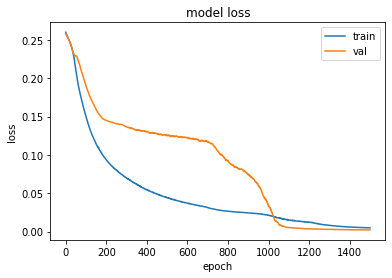

In [ ]:
# visualise accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# visualise loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 1.0000
Test results - Loss: 0.0186457596719265 - Accuracy: 100.0%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


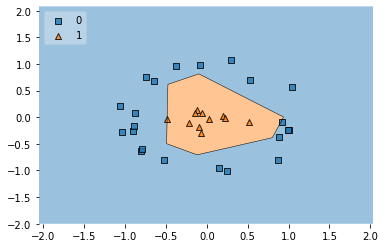

In [ ]:
# evaluate the model
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# visualise the decision boundary
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

As you can see, the model with only one hidden layer and 10 neurons amounts to 41 parameters, while the network with 2 hidden layers with 3 and 2 neurons, to only 20. That means less memory and less time computing, so it's execution will be faster, even though as we saw it might take longer to converge during training. And the results are very similar.

For this reason, even if following the Universal Aproximation Theorem, a network with a single hidden layer could approximate every possible function, due to the number of parameters it would need to have, in practice we always prefer to go deeper than wider (higher number of layers with less neurons each, rather than lower number of layers with more neurons).